- Lab Task
- Mohsin Zia - 2020244
- Instructor: Sir Muneeb

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2 
import glob
import random
import tensorflow as tf
import tensorflow_hub as hub
import shutil

In [3]:
from zipfile import ZipFile

dataset = './archive.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('Complete dataset is extracted')

Complete dataset is extracted


In [4]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('./train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  697


In [5]:
file_names = os.listdir('./train/')
#print(file_names)

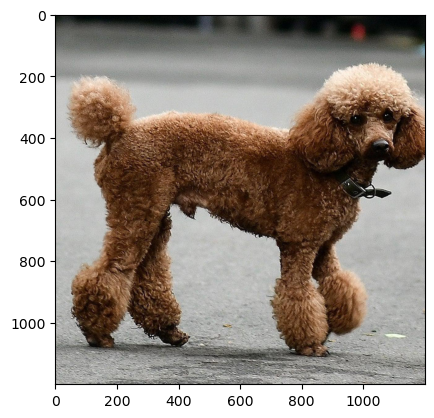

In [6]:
# display dog image
img = mpimg.imread('train/dog_43.jpg')
imgplt = plt.imshow(img)
plt.show()

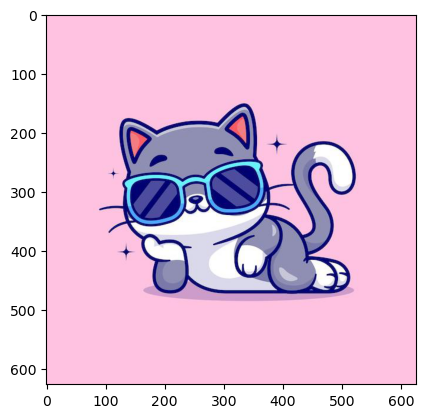

In [7]:
# display cat image
img = mpimg.imread('train/cat_161.jpg')
imgplt = plt.imshow(img)
plt.show()

In [8]:
file_names = os.listdir('./train/')

name = file_names
print(name[0:5])


['cat_1.jpg', 'cat_10.jpg', 'cat_100.jpg', 'cat_101.jpg', 'cat_102.jpg']


In [9]:
file_names = os.listdir('./train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

    name = img_file[0:3]

    if name == 'dog':
        dog_count += 1

    else:
        cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 348
Number of cat images = 349


In [10]:
#removing if the directory is already present
shutil.rmtree('./resizedImages', ignore_errors=True)
#creating a directory for resized images
os.mkdir('./resizedImages')

In [11]:
original_folder = './train/'
resized_folder = './resizedImages/'

for i in range(697):

    filename = os.listdir(original_folder)[i]
    img_path = original_folder+filename

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    newImgPath = resized_folder+filename
    img.save(newImgPath)

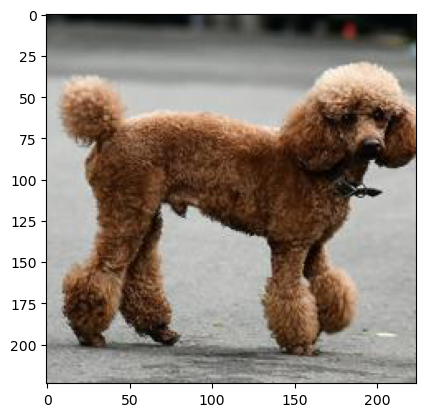

In [12]:
# display resized dog image
img = mpimg.imread('./resizedImages/dog_43.jpg')
imgplt = plt.imshow(img)
plt.show()

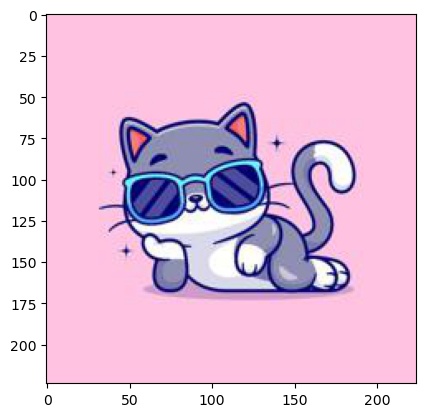

In [13]:
# display resized dog image
img = mpimg.imread('./resizedImages/cat_161.jpg')
imgplt = plt.imshow(img)
plt.show()

   ####  Classification Labels

- 0 -> Cat
- 1 -> Dog

In [14]:
# creaing a for loop to assign labels
filenames = os.listdir('./resizedImages/')


labels = []

for i in range(697):

    file_name = filenames[i]
    label = file_name[0:3]

    if label == 'dog':
        labels.append(1)

    else:
        labels.append(0)

In [15]:
print(f"Length of label list = {len(filenames)}")

for i in range(5):
    randomIndex = random.randint(0,len(filenames))
    print(filenames[randomIndex], end = "  ")


Length of label list = 697
dog_293.jpg  dog_405.jpg  dog_408.jpg  cat_113.jpg  cat_426.jpg  

In [16]:
print(f"Length of label list = {len(labels)}")

for i in range(10):
    randomIndex = random.randint(0,len(labels))
    print(labels[randomIndex], end = " ")


Length of label list = 697
0 1 0 1 0 1 1 0 0 1 

In [17]:
# counting the images of dogs and cats out of 550 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[349 348]


In [18]:
image_directory = './resizedImages/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
#type cast images -> 2D Matrix string pixel values.
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [19]:
#print(dog_cat_images)

In [20]:
type(dog_cat_images)

numpy.ndarray

In [21]:
print(dog_cat_images.shape)
##(Total Images, Matrix Rows, Matrix Columns, Parameters)

(697, 224, 224, 3)


In [22]:
X = dog_cat_images
Y = np.asarray(labels)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state
                                                    =2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(697, 224, 224, 3) (557, 224, 224, 3) (140, 224, 224, 3)


In [25]:
# scaling the data (Normalize b/w 0 and 1)
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [26]:
# print(X_train_scaled)
# print(X_test_scaled)

In [27]:
# MobileNet V2 is a family of neural network architectures for efficient on-device image classification and related tasks

In [28]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [29]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [30]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [31]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
18/18 [==============================] - 13s 408ms/step - loss: 0.4488 - acc: 0.7810
Epoch 2/5
18/18 [==============================] - 7s 397ms/step - loss: 0.1973 - acc: 0.9318
Epoch 3/5
18/18 [==============================] - 8s 441ms/step - loss: 0.1498 - acc: 0.9443
Epoch 4/5
18/18 [==============================] - 7s 384ms/step - loss: 0.1091 - acc: 0.9659
Epoch 5/5
18/18 [==============================] - 7s 379ms/step - loss: 0.0905 - acc: 0.9731


In [32]:
score, acc = model.evaluate(X_test_scaled, Y_test)
#print('Test Loss =', score)
print('Test Accuracy =', acc*100)

5/5 [==============================] - 3s 340ms/step - loss: 0.1050 - acc: 0.9429
Test Accuracy = 94.28571462631226


In [33]:
def classifyImage(path):
    
    input_image = cv2.imread(path)
    plt.imshow(input_image)
    plt.show()

    input_image_resize = cv2.resize(input_image, (224,224))

    input_image_scaled = input_image_resize/255

    image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

    input_prediction = model.predict(image_reshaped)

    print(input_prediction)

    input_pred_label = np.argmax(input_prediction)

    print(f"Label Predicted: {input_pred_label}")

    if input_pred_label == 0:
        print('The image represents a Cat')

    else:
        print('The image represents a Dog')
    

In [34]:
def plotData(imagesPath: list):

    classes = ['Cat', 'Dog']
    LabelsList = np.empty(shape=(len(imagesPath)))
    
    for i in range(len(imagesPath)):    
        input_image = cv2.imread(imagesPath[i])
#         plt.imshow(input_image)
#         plt.show()

        input_image_resize = cv2.resize(input_image, (224,224))

        input_image_scaled = input_image_resize/255

        image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

        input_prediction = model.predict(image_reshaped)

        input_pred_label = np.argmax(input_prediction)
        LabelsList[i] = input_pred_label
    
    fig, axes = plt.subplots(nrows= 1, ncols=len(imagesPath), figsize=(15, 10))

    fig.suptitle('Classfication Of Cats And Dogs', fontsize = 20)
    fig.tight_layout()
    fig.subplots_adjust(top=1.5)        

    for i in range(len(imagesPath)):
        input_image = cv2.imread(imagesPath[i])
        axes[i].imshow(input_image)
        axes[i].axis('off')
        axes[i].title.set_text(classes[int(LabelsList[i])])        


1/1 [==============================] - 0s 50ms/step


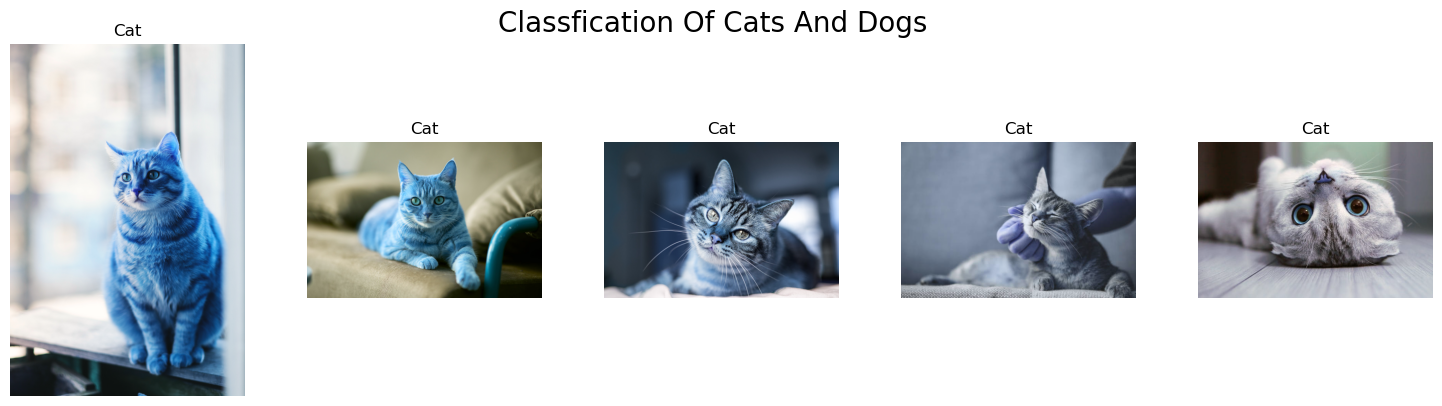

In [35]:
filesToRead = 5

catsImagesPath = ['']*filesToRead

for i in range(5):
    catsImagesPath[i] = "./testingData/Cat"+str(i+1)+".jpg"

plotData(catsImagesPath)

1/1 [==============================] - 0s 43ms/step


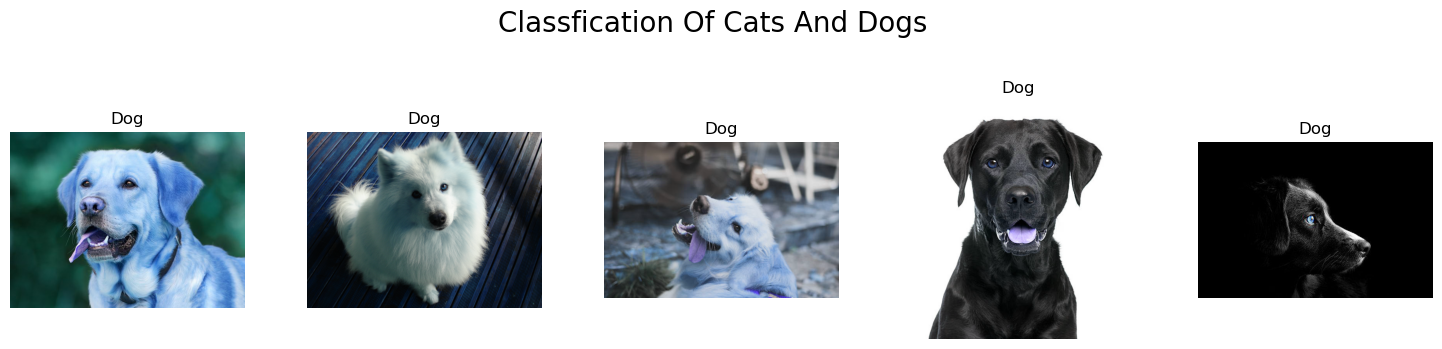

In [36]:
filesToRead = 5

dogsImagesPath = ['']*filesToRead

for i in range(5):
    dogsImagesPath[i] = "./testingData/Dog"+str(i+1)+".jpg"

plotData(dogsImagesPath)

In [37]:
# for i in range(5):
#     classifyImage(catsImagesPath[i])

In [38]:
# for i in range(5):
#     classifyImage(dogsImagesPath[i])

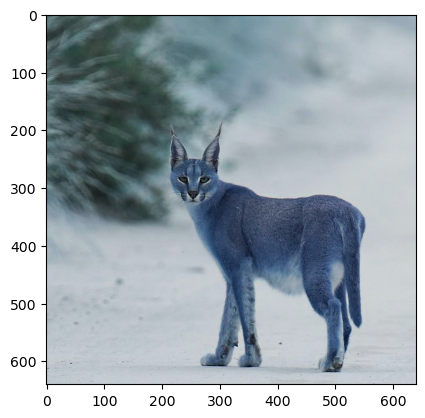

1/1 [==============================] - 0s 35ms/step
[[1.6158589  0.15138206]]
Label Predicted: 0
The image represents a Cat


In [39]:
classifyImage("./testingData/test.jpg")